<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
!apt-get --purge remove cuda nvidia* libnvidia-*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-fs-prebuilt' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'


In [ ]:
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

dpkg: dependency problems prevent removal of cuda-command-line-tools-10-0:
 cuda-tools-10-0 depends on cuda-command-line-tools-10-0 (>= 10.0.130).

dpkg: error processing package cuda-command-line-tools-10-0 (--purge):
 dependency problems - not removing
Errors were encountered while processing:
 cuda-command-line-tools-10-0
dpkg: dependency problems prevent removal of cuda-command-line-tools-10-1:
 cuda-tools-10-1 depends on cuda-command-line-tools-10-1 (>= 10.1.243).

dpkg: error processing package cuda-command-line-tools-10-1 (--purge):
 dependency problems - not removing
Errors were encountered while processing:
 cuda-command-line-tools-10-1
dpkg: dependency problems prevent removal of cuda-command-line-tools-11-0:
 cuda-tools-11-0 depends on cuda-command-line-tools-11-0 (>= 11.0.3).

dpkg: error processing package cuda-command-line-tools-11-0 (--purge):
 dependency problems - not removing
Errors were encountered while processing:
 cuda-command-line-tools-11-0
(Reading database ...

In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2021-07-08 06:05:31--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2021-07-08 06:05:31--  https://developer.nvidia.com/compute/cuda/9.2/prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?WhTpyRoOM8NaqL-VI82_QZD6e7c5QFDdOVDtI_njy2B0r3GVMYoLLsqlHzUE1NcExvr8-0KpWPupOnNb4ikktNWg9x7e92Ard3XnoRdkwcLBHkxpQ

In [ ]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-p9a6_kgo
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-p9a6_kgo
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp37-none-any.whl size=4305 sha256=5564f9acd5cfac91b10f08a88b7c54e604f50d4c5c5f9701578d421ace0440c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-_4gha3ep/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
%%cu
#include <iostream>
int main()
{
	std::cout << "Welcome To GeeksforGeeks\n";
	return 0;
}


Welcome To GeeksforGeeks



In [ ]:
%%writefile vector_add.c
#include<stdio.h>
#include<stdlib.h>
#define N 100000000

void vector_add(float *out, float *a, float *b, int n) {
    for(int i = 0; i < n; i++){
        out[i] = a[i] + b[i];
    }
}

int main(){
    float *a, *b, *out; 

    // Allocate memory
    a   = (float*)malloc(sizeof(float) * N);
    b   = (float*)malloc(sizeof(float) * N);
    out = (float*)malloc(sizeof(float) * N);

    // Initialize array
    for(int i = 0; i < N; i++){
        a[i] = 1.0f; b[i] = 2.0f;
    }

    // Main function
    vector_add(out, a, b, N);
    printf("\n Done with Vector Addition");
}


Overwriting vector_add.c


In [ ]:
%%writefile vector_add.cu
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <assert.h>
#include <cuda.h>
#include <cuda_runtime.h>

#define N 100000000
#define MAX_ERR 1e-6

__global__ void vector_add(float *out, float *a, float *b, int n) {
    for(int i = 0; i < n; i ++){
        out[i] = a[i] + b[i];
    }
}

int main(){
    float *a, *b, *out;
    float *d_a, *d_b, *d_out; 

    // Allocate host memory
    a   = (float*)malloc(sizeof(float) * N);
    b   = (float*)malloc(sizeof(float) * N);
    out = (float*)malloc(sizeof(float) * N);

    // Initialize host arrays
    for(int i = 0; i < N; i++){
        a[i] = 1.0f;
        b[i] = 2.0f;
    }

    // Allocate device memory
    cudaMalloc((void**)&d_a, sizeof(float) * N);
    cudaMalloc((void**)&d_b, sizeof(float) * N);
    cudaMalloc((void**)&d_out, sizeof(float) * N);

    // Transfer data from host to device memory
    cudaMemcpy(d_a, a, sizeof(float) * N, cudaMemcpyHostToDevice);
    cudaMemcpy(d_b, b, sizeof(float) * N, cudaMemcpyHostToDevice);

    // Executing kernel 
    vector_add<<<10,100>>>(d_out, d_a, d_b, N);
    
    // Transfer data back to host memory
    cudaMemcpy(out, d_out, sizeof(float) * N, cudaMemcpyDeviceToHost);

    // Verification
    //for(int i = 0; i < N; i++){
    //    assert(fabs(out[i] - a[i] - b[i]) < MAX_ERR);
    //}
    //printf("out[0] = %f\n", out[0]);
    printf("PASSED\n");

    // Deallocate device memory
    cudaFree(d_a);
    cudaFree(d_b);
    cudaFree(d_out);

    // Deallocate host memory
    free(a); 
    free(b); 
    free(out);
}


Overwriting vector_add.cu


In [ ]:
from numba import jit, cuda
import numpy as np
# to measure exec time
from timeit import default_timer as timer

# normal function to run on cpu
def func(a):								
	for i in range(10000000):
		a[i]+= 1	

# function optimized to run on gpu
@cuda.jit
def func2a(a):					
 # Thread id in a 1D block
    tx = cuda.threadIdx.x
    # Block id in a 1D grid
    ty = cuda.blockIdx.x
    # Block width, i.e. number of threads per block
    bw = cuda.blockDim.x
    # Compute flattened index inside the array
    pos = tx + ty * bw
    if pos < a.size:  # Check array boundaries
        a[pos]+= 1
if __name__=="__main__":
	n = 10000000							
	a = np.ones(n, dtype = np.float64)
	b = np.ones(n, dtype = np.float32)
	
start = timer()
func(a)
print("without GPU:", timer()-start)	
	
start = timer()
threadsperblock = 32
blockspergrid = (a.size + (threadsperblock - 1)) // threadsperblock
func2a[blockspergrid, threadsperblock](a)
print("with GPU:", timer()-start)

without GPU: 4.891661536001266
with GPU: 0.1765786140003911


In [ ]:
ls -l

total 1237720
-rw-r--r-- 1 root root 1267391958 May  1  2018 cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
-rwxr-xr-x 1 root root       8384 Jul  8 06:34 output_vector_add*
drwxr-xr-x 1 root root       4096 Jul  1 13:42 sample_data/
drwxr-xr-x 2 root root       4096 Jul  8 06:15 src/
-rw-r--r-- 1 root root        575 Jul  8 06:34 vector_add.c
-rw-r--r-- 1 root root       1537 Jul  8 06:42 vector_add.cu


In [ ]:
ls -l

total 1237716
-rw-r--r-- 1 root root 1267391958 May  1  2018 cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
-rwxr-xr-x 1 root root       8344 Jul  8 06:32 output_vector_add*
drwxr-xr-x 1 root root       4096 Jul  1 13:42 sample_data/
drwxr-xr-x 2 root root       4096 Jul  8 06:15 src/
-rw-r--r-- 1 root root        575 Jul  8 06:34 vector_add.c


In [ ]:
%%shell
gcc vector_add.c -o output_vector_add
./output_vector_add


 Done with Vector Addition

In [ ]:
%%shell
nvcc vector_add.cu -o vector_add_cu
./vector_add_cu

PASSED


In [ ]:
%%shell
time ./vector_add_cu

PASSED

real	0m7.142s
user	0m6.400s
sys	0m0.722s


In [ ]:
%%shell
nvprof ./vector_add

======== Warning: This version of nvprof doesn't support the underlying device, GPU profiling skipped
out[0] = 3.000000
PASSED


In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

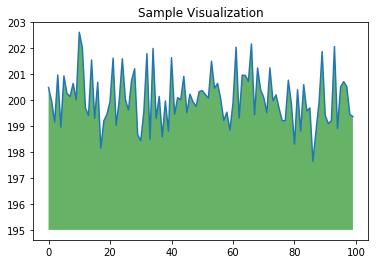

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
